In [360]:
import os
import pandas as pd
from data_preprocessing import Preprocessor
from logger import App_Logger



In [367]:
filepath = r'E:\Me\Project\INeuron\creditCardDefaulters\creditCardDefaulters\code\creditCardDefaulters\Training_Batch_Files'

first_file_found = 0
for input_file in os.listdir(filepath):
    if input_file.endswith('csv'):       
        if first_file_found == 0:  # For the first file load it as it is, so that we get the column names as well 
            first_file_found += 1  # from the next file we do, just have to append them one by one
            df = pd.read_csv(os.path.join(filepath,  input_file))
        else:
            temp_df = pd.read_csv(os.path.join(filepath,  input_file))
            df = pd.concat([df, temp_df])

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [368]:
df.shape

(31031, 24)

In [330]:
df.SEX.unique()

array([2, 1], dtype=int64)

In [331]:
df['SEX_MALE'] = df['SEX'].map(lambda x: 1 if x== 1 else 0)
df.drop('SEX', inplace=True, axis = 1)

In [332]:
df.EDUCATION.value_counts()

2    13877
1    12310
3     4627
5       93
6       62
4       62
Name: EDUCATION, dtype: int64

In [333]:
df['default payment next month'].value_counts()

0    24429
1     6602
Name: default payment next month, dtype: int64

In [334]:
cat_columns_to_encode = ['EDUCATION', 'MARRIAGE']
logfile =  open('preprocessing_log.log', 'a+')
pre_obj = Preprocessor(logfile, App_Logger())

In [335]:
numerical_columns_to_scale = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [336]:
scaled_numeric_df = pre_obj.scale_numerical_columns(df, numerical_columns_to_scale)
scaled_numeric_df.shape

(31031, 20)

In [337]:
df_dummies = pre_obj.encode_categorical_columns(df, cat_columns_to_encode)
df_dummies.shape

(31031, 8)

In [338]:
df_dummies = df_dummies.reset_index(drop=True)
scaled_numeric_df = scaled_numeric_df.reset_index(drop=True)

In [339]:
df_combined= pd.concat([df_dummies, scaled_numeric_df], axis=1)
df_combined.head()

,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,0,0,0,0,1,0,0,-1.136982,-1.191862,...,-0.642255,-0.607059,-0.628743,-0.611313,-0.443120,-0.277935,-0.397458,-0.350656,-0.321780,-0.214458
1,1,0,0,0,0,0,1,0,-0.367055,-0.974281,...,-0.613246,-0.558123,-0.573030,-0.558656,-0.443120,-0.257971,-0.301242,-0.275443,-0.321780,-0.129790
2,1,0,0,0,0,0,1,0,-0.598033,-0.103959,...,-0.454925,-0.392723,-0.387702,-0.360235,-0.317953,-0.225874,-0.301242,-0.275443,-0.260600,-0.002787
3,1,0,0,0,0,1,0,0,-0.906004,0.222412,...,0.065176,-0.183593,-0.161769,-0.134202,-0.278210,-0.192557,-0.281999,-0.267921,-0.256379,-0.172124
4,1,0,0,0,0,1,0,0,-0.906004,2.398217,...,-0.130684,-0.293879,-0.320007,-0.302394,-0.278210,2.032533,0.564705,0.326262,-0.279627,-0.185713


In [340]:
x = df_combined.copy()
y = df['default payment next month']

## Clustering

3

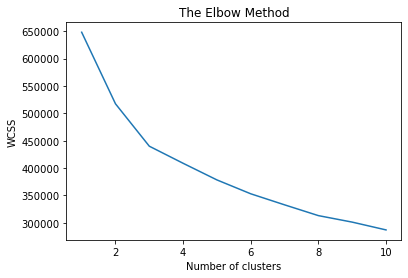

In [341]:
from clustering import KMeansClustering

km = KMeansClustering(logfile, App_Logger())
num_clusters = km.elbow_plot(x)
num_clusters


In [342]:
data_with_clusters = km.create_clusters(x, num_clusters)
data_with_clusters.head()

,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Cluster
0,1,0,0,0,0,1,0,0,-1.136982,-1.191862,...,-0.607059,-0.628743,-0.611313,-0.443120,-0.277935,-0.397458,-0.350656,-0.321780,-0.214458,2
1,1,0,0,0,0,0,1,0,-0.367055,-0.974281,...,-0.558123,-0.573030,-0.558656,-0.443120,-0.257971,-0.301242,-0.275443,-0.321780,-0.129790,0
2,1,0,0,0,0,0,1,0,-0.598033,-0.103959,...,-0.392723,-0.387702,-0.360235,-0.317953,-0.225874,-0.301242,-0.275443,-0.260600,-0.002787,0
3,1,0,0,0,0,1,0,0,-0.906004,0.222412,...,-0.183593,-0.161769,-0.134202,-0.278210,-0.192557,-0.281999,-0.267921,-0.256379,-0.172124,0
4,1,0,0,0,0,1,0,0,-0.906004,2.398217,...,-0.293879,-0.320007,-0.302394,-0.278210,2.032533,0.564705,0.326262,-0.279627,-0.185713,0


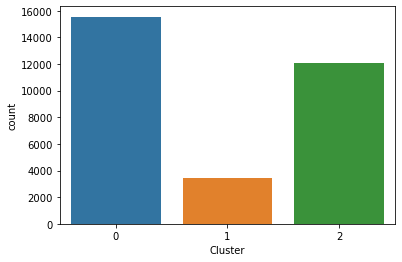

In [343]:
import seaborn as sns
sns.countplot(x = 'Cluster', data=data_with_clusters)

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

class ModelFinder:

    def __init__(self, x, y) -> None:
        self.x, self.y = x, y

    def find_best_model(self, estimators, param_grids, cv = 5):
        self.estimators = estimators
        self.param_grids = param_grids
        self.cv = cv
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size = 0.2)
        results = []
        for estimator, params in zip(self.estimators, self.param_grids):
            gcv = GridSearchCV(estimator, param_grid=params, cv = self.cv, scoring='f1', verbose=True)
            gcv.fit(self.x_train, self.y_train)
            self.score = gcv.score(self.x_test, self.y_test)
            results.append((gcv.best_estimator_, self.score))
        return results
        

    def compare_models(self, results):
        self.model_names = [str(results[i][0].__class__).split(".")[-1].strip("'>") for i in range(len(results))]
        self.scores = [results[i][1] for i in range(len(results))]
        plt.bar(self.model_names, self.scores, width=0.4)
        plt.title("Perfomence of various models")
        plt.xlabel("Model")
        plt.ylabel("f1 Scores")


In [345]:
x = data_with_clusters
y = df['default payment next month']

In [346]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

xgb = XGBClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()

xgb_params = { "n_estimators": [50],"max_depth": range(3, 6, 1)}
lr_params = {"penalty": ["l1", "l2"]}
rf_params = {'max_features': [0.5, 0.6]}

params = [xgb_params, rf_params]
models = [xgb, rf]

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.8s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   35.0s finished


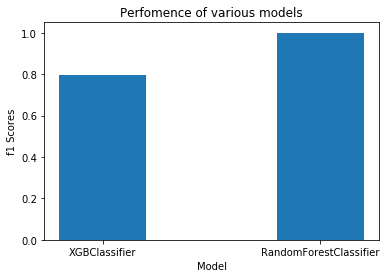

In [347]:
mf = ModelFinder(x,y)
results = mf.find_best_model(models, params, cv=3)
#results
mf.compare_models(results)